In [1]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [2]:
df=pd.read_csv("2015.csv")
df1=pd.read_csv("2016.csv")
df2=pd.read_csv("2017.csv")
df3=pd.read_csv('2018.csv')
df4=pd.read_csv('2019.csv')

## Data Preprocessing

In [3]:
df['Year']=2015
df1['Year']=2016
df2['Year']=2017
df3['Year']=2018
df4['Year']=2019

In [4]:
dfm=pd.concat([df,df1,df2,df3,df4], ignore_index=True)

In [5]:
df=dfm[dfm['Country'].notnull()]

### Treat the Misssing Data

In [6]:
# Remove the field that has more then 60% missing values
df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [7]:
# Treat non-numeric fields

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            val=df[label].value_counts().index[0]
            df.label=df[label].fillna(df[label].mode().iloc[0])

<ipython-input-7-46076cd080b6>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.label=df[label].fillna(df[label].mode().iloc[0])


In [8]:
# Treat numeric data fields

for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            val=df[label].mean()
            df[label]=df[label].fillna(val)

In [9]:
df.Country=df.Country.replace('United Arab Emirates','UAE')

## Exploratory Data Analysis

### Descriptive Statistics

<ipython-input-10-a9a3817749b1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ax=sns.heatmap(df.drop(['Year','Region','Happiness Rank'],1).describe().


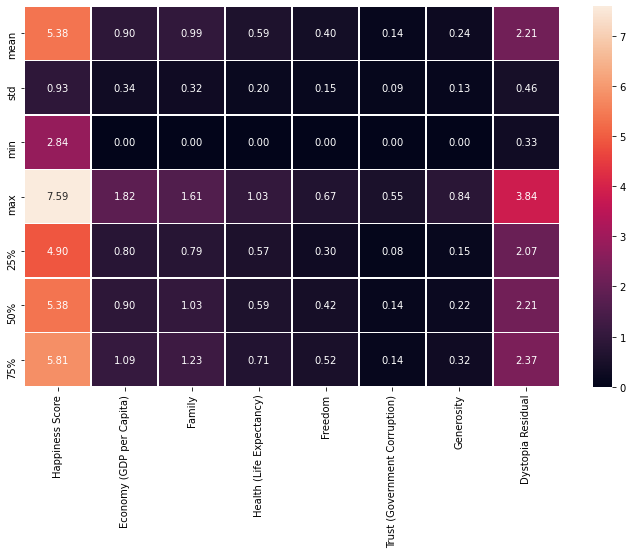

In [10]:
fig, ax=plt.subplots(figsize=(12,7))
ax=sns.heatmap(df.drop(['Year','Region','Happiness Rank'],1).describe().
               loc[['mean', 'std', 'min', 'max', '25%','50%','75%']],
            annot=True,
              linewidth=0.5,
              fmt=".2f")

In [11]:
dfagg=df.groupby('Country',as_index=False, sort=False).mean()

### Top 10 Countries

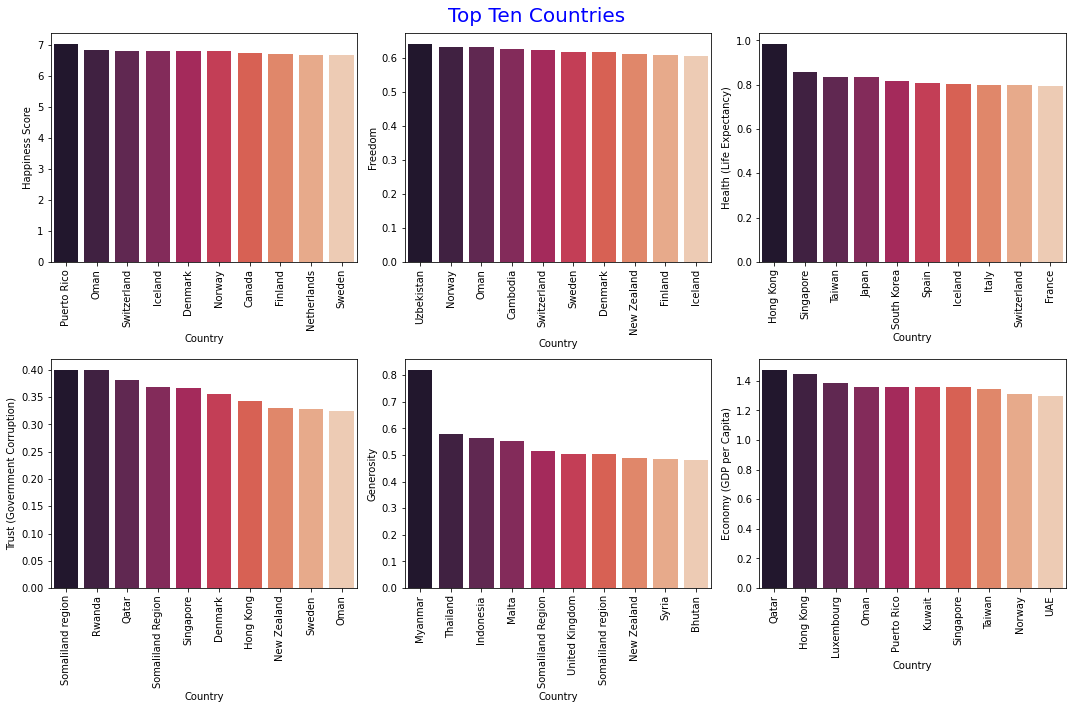

In [12]:
col=['Happiness Score','Freedom','Health (Life Expectancy)','Trust (Government Corruption)',
    'Generosity','Economy (GDP per Capita)']
n_rows=2
n_cols=3
fig, ax=plt.subplots(n_rows,n_cols,figsize=(15,10))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if i<len(col):
            ax_i=ax[r,c]
            fig.suptitle('Top Ten Countries',color='Blue',fontsize=20)
            s1=sns.barplot(x='Country',y=col[i], data=dfagg, palette='rocket',
               order=dfagg.sort_values(col[i],ascending = False).Country.iloc[:10],ax=ax_i)
            ax_i.set_xticklabels(ax_i.get_xticklabels(),rotation=90);
        
plt.tight_layout()

### Bottom 10 Countries

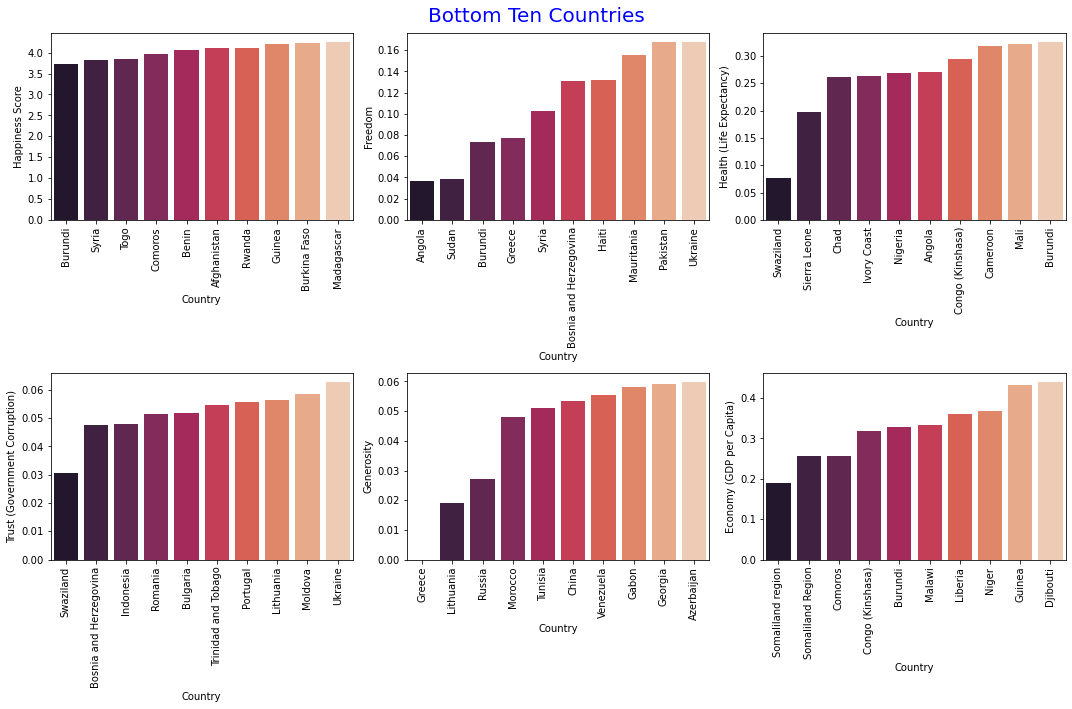

In [13]:
import warnings
warnings.filterwarnings("ignore")

col=['Happiness Score','Freedom','Health (Life Expectancy)','Trust (Government Corruption)',
    'Generosity','Economy (GDP per Capita)']

n_rows=2
n_cols=3

fig, ax=plt.subplots(n_rows,n_cols,figsize=(15,10))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if i<len(col):
            ax_i=ax[r,c]
            fig.suptitle('Bottom Ten Countries',color='Blue',fontsize=20)
            sns.barplot(x='Country',y=col[i], data=dfagg, palette='rocket',
               order=dfagg.sort_values(col[i],ascending = True).Country.iloc[:10],ax=ax_i)
            ax_i.set_xticklabels(ax_i.get_xticklabels(),rotation=90);
plt.tight_layout()


In [14]:
list=dfagg.sort_values('Economy (GDP per Capita)',ascending = False).Country.iloc[:3]

### Trends of Hapiness Facotrs of Top 3 Countries (Based on GDP)

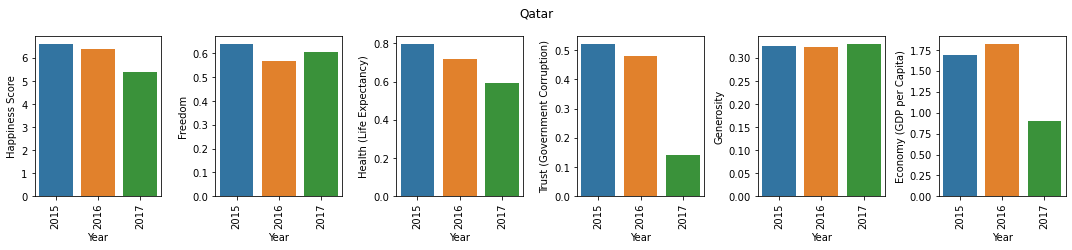

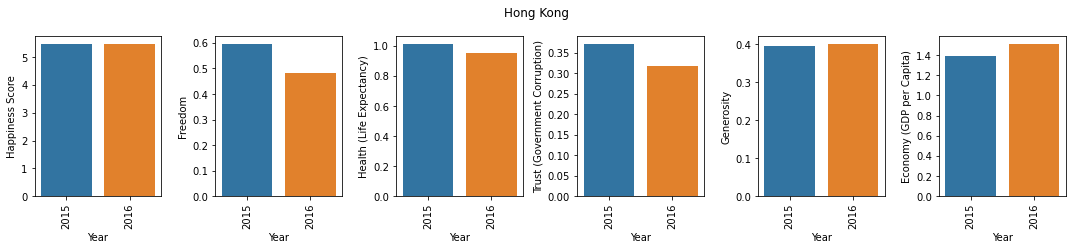

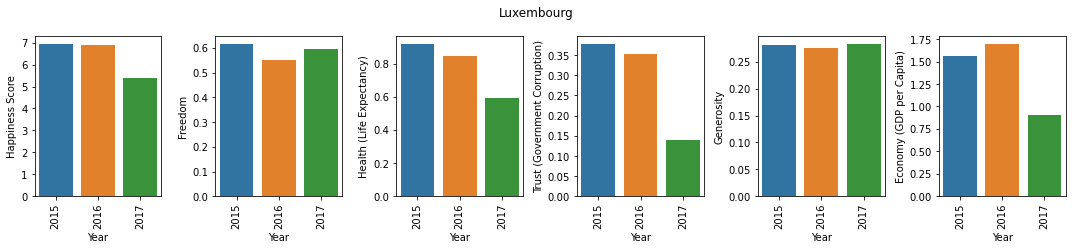

In [15]:
def TrendPlot(location):

    col=['Happiness Score','Freedom','Health (Life Expectancy)','Trust (Government Corruption)',
        'Generosity','Economy (GDP per Capita)']
    
    n_cols=6

    fig, ax=plt.subplots(1,n_cols,figsize=(15,3.5))
    fig.suptitle(location)
    for c in range(0,n_cols):
        i=c
        if i<len(col):
            ax_i=ax[c]
            sns.barplot(x='Year',y=col[i], data=df[df.Country==location],ax=ax_i)
            ax_i.set_xticklabels(ax_i.get_xticklabels(),rotation=90);
    plt.tight_layout()
        
for elements in list:
        TrendPlot(elements) 

### Probablity Distribution and BoxPlot

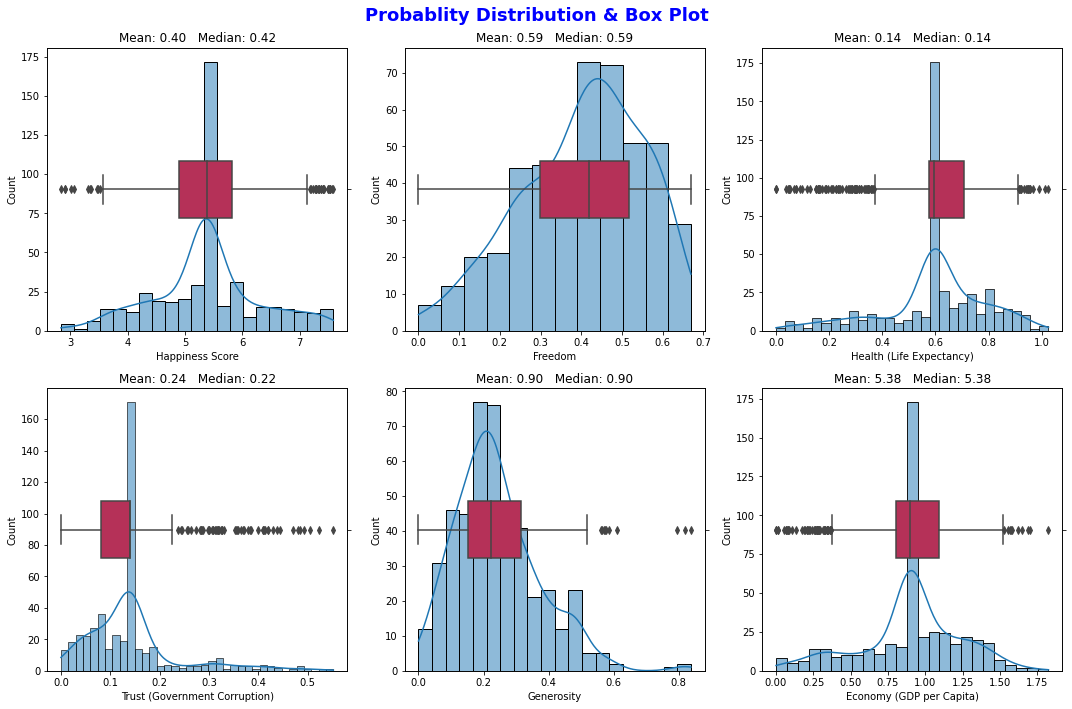

In [16]:
col=['Happiness Score','Freedom','Health (Life Expectancy)','Trust (Government Corruption)',
    'Generosity','Economy (GDP per Capita)']

n_rows=2
n_cols=3

fig, ax=plt.subplots(n_rows,n_cols,figsize=(15,10))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if i<len(col):
            ax_i=ax[r,c]
            fig.suptitle('Probablity Distribution & Box Plot',color='Blue',fontsize=18,fontweight='bold')
            mean= "{:.2f}".format(df[col[i]].mean())
            median="{:.2f}".format(df[col[i]].median())
            plt.title ('Mean: '+ mean + '   Median: '+median)
            axh=sns.histplot(data=df, x=col[i],  palette='rocket', kde=True, ax=ax_i)
            ax2 = axh.twinx()
            ax3=sns.boxplot(data=df, x=col[i],  palette='rocket', ax=ax2)
            ax3.set(ylim=(-2, 2))
        
plt.tight_layout()

### Corelation Heatmap

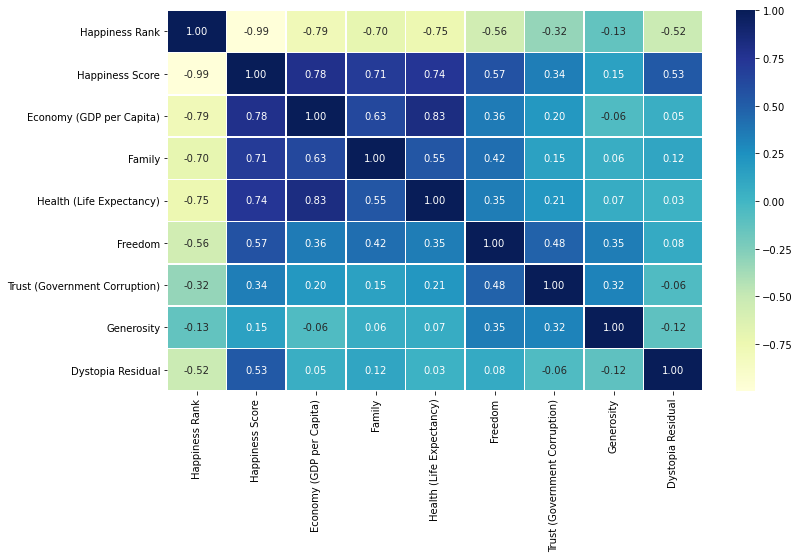

In [17]:
fig, ax=plt.subplots(figsize=(12,7))
ax=sns.heatmap(df.groupby('Country').mean().drop(['Year'],1).corr(),
            annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

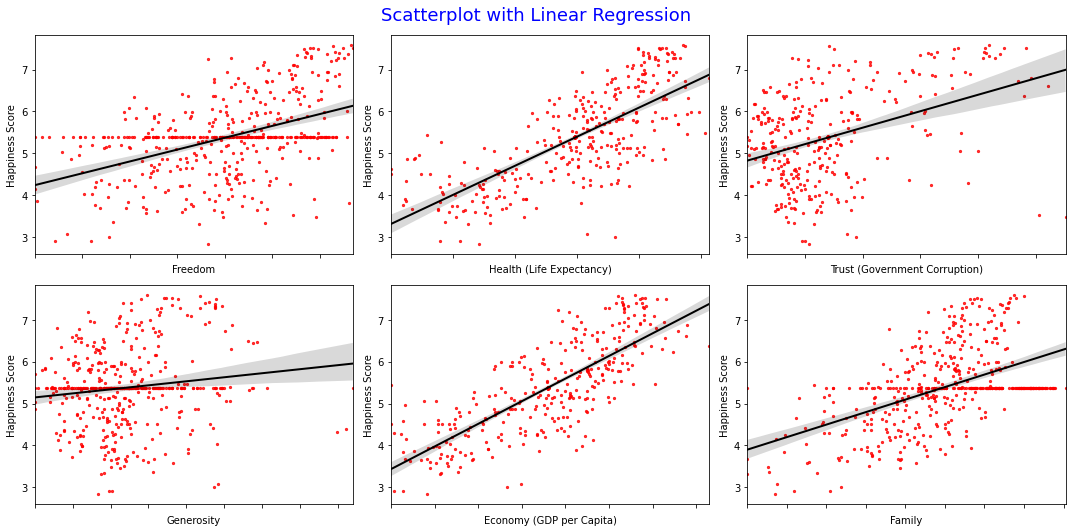

In [46]:
#sns.lmplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df,
 #         scatter_kws={'color':'darkred', 'marker':'^'}, line_kws={'color':'black', 'lw':2}, height=5, aspect=1);

import warnings
warnings.filterwarnings("ignore")

col=['Freedom','Health (Life Expectancy)','Trust (Government Corruption)',
    'Generosity','Economy (GDP per Capita)','Family']

n_rows=2
n_cols=3

fig, ax=plt.subplots(n_rows,n_cols,figsize=(15,7.5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if i<len(col):
            ax_i=ax[r,c]
            fig.suptitle('Scatterplot with Linear Regression',color='Blue',fontsize=18)
            #sns.lmplot(x=col[i], y='Happiness Score', data=df, ax=ax_i);
            sns.regplot(y='Happiness Score',x=col[i], data=df,
                        scatter_kws={'color':'red',"s": 5},
                        line_kws={'color':'black', 'lw':2}, ax=ax_i)
            ax_i.set_xticklabels(ax_i.get_xticklabels(),rotation=90);
plt.tight_layout()

Key Insight

1. Strong relation of Happiness Score with GDP and Health (Life Expectancy)
2. Family, Freedom and Trust (Government Corruption) has also quite strong relation with Hapiness Score
3. Generosity seems does not have any relation with Hapiness Score